# Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

In [3]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,9)

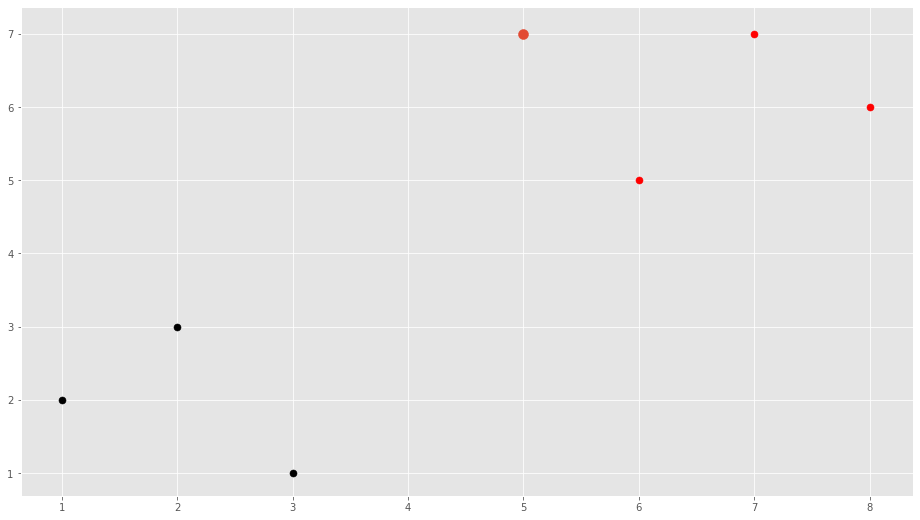

In [4]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100)

In [5]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))
            d = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([d, group])
    if verbose:
        print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna
    if verbose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    
    
    return vote_result[0][0]#[('r',2), ('k', 1)]

In [6]:
new_point = [4,4.5]
result = k_nearest_neighbors(dataset, [new_point])
result

'k'

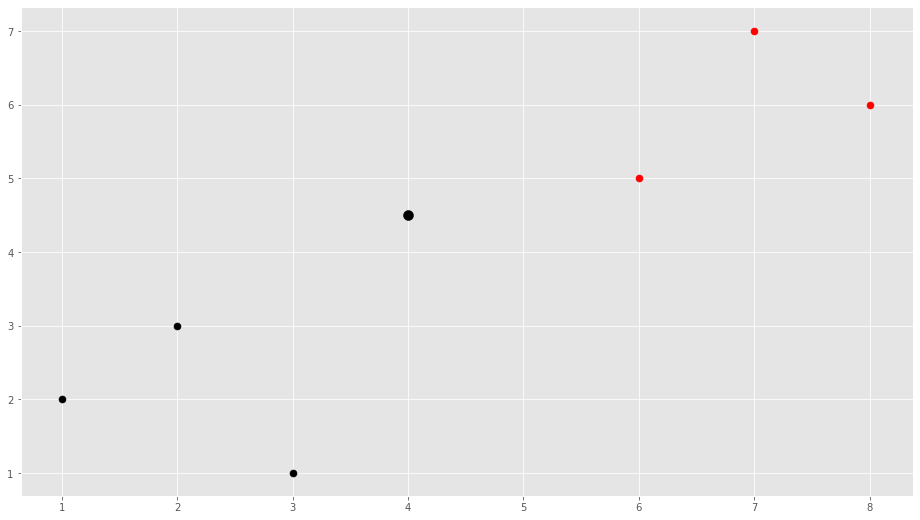

In [7]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color=result)

# Aplicando nuestro KNN al Dataset del Cancer

In [9]:
import pandas as pd
df = pd.read_csv("../python-ml-course-master/datasets/cancer/breast-cancer-wisconsin.data.txt")
df.replace("?", -99999, inplace=True)
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]
df.drop(["name"], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [10]:
import random

In [11]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[], 4:[]}

In [12]:
train_data= full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [13]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [14]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9712230215827338


* En este caso, nuestro algoritmo termino siendo mucho ma potente y exacto que el K vecino implementado de Sklearn